In [6]:
pip install -U tensorflow-addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import tensorflow
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,BatchNormalization,Add,Input,ReLU,ELU,LayerNormalization
from tensorflow_addons.layers import GroupNormalization

In [8]:
from keras.datasets import cifar10
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()
cifar10_labels = ["airplane",
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]

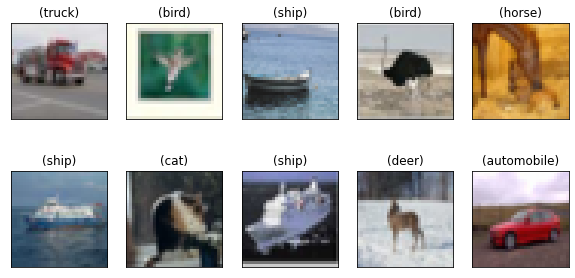

In [9]:
figure = plt.figure(figsize=(10, 5))
for i, index in enumerate(np.random.choice(X_train.shape[0], size = 10, replace = False)):
    img = figure.add_subplot(2, 5, i + 1, xticks = [], yticks = [])
    # Displaying each image
    img.imshow(np.squeeze(X_train[index]))
    true_index = (Y_train[index])[0]
    # Setting the title for each image
    img.set_title("({})".format(cifar10_labels[true_index]))

In [10]:
#Data_normalization
x_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255
# # Converting RGB to Grayscale
# x_train = np.mean(x_train, axis=3)
# x_test= np.mean(x_test, axis=3)
#One hot encoding
y_train = keras.utils.to_categorical(Y_train, 10)
y_test = keras.utils.to_categorical(Y_test, 10)

In [11]:
# plt.subplot(1, 2, 1)
# plt.imshow(X_train[12])
# plt.title('(RGB)')
# plt.subplot(1, 2, 2)
# plt.imshow(x_train[12].reshape(32,32), cmap = 'gray')
# plt.title('(grayscale)')


In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
norm=False
from keras import Model
from matplotlib.cbook import flatten
x1=Input((32,32,3))
x = Conv2D(32,(3,3),activation='elu',padding='same')(x1)
if norm=='batch': x = BatchNormalization()(x)
if norm=='layer': x = LayerNormalization()(x)
if norm=='group': x = GroupNormalization(32,axis=3)(x)
x = Conv2D(64,(3,3),padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)
x = ELU()(x)
r1=Conv2D(64,(3,3),activation='elu',padding='same')(x)
r1=Conv2D(64,(3,3),activation='elu',padding='same')(x)
L1=Add()([x,r1])
if norm=='batch': L1 = BatchNormalization()(L1)
if norm=='layer': L1 = LayerNormalization()(L1)
if norm=='group': L1 = GroupNormalization(32,axis=3)(L1)
L2=Conv2D(128,(3,3),padding='same')(L1)
L2=MaxPooling2D((2,2))(L2)
L2 = Dropout(0.2)(L2)
L2=ELU()(L2)
L2=Conv2D(256,(3,3),padding='same')(L2)
L2=MaxPooling2D((2,2))(L2)
L2 = Dropout(0.2)(L2)
L2=ELU()(L2)
r2=Conv2D(256,(3,3),activation='elu',padding='same')(L2)
r2=Conv2D(256,(3,3),activation='elu',padding='same')(r2)
L3=Add()([L2,r2])
if norm=='batch': L3 = BatchNormalization()(L3)
if norm=='layer': L3 = LayerNormalization()(L3)
if norm=='group': L3 = GroupNormalization(32,axis=3)(L3)
out=MaxPooling2D((3,3))(L3)
out = Dropout(0.2)(out)
out=Flatten()(out)
out=Dense(10, activation="softmax")(out)
model=Model(x1,out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 64)   0           ['conv2d_1[0][0]']               
                                                                                              

In [14]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
import  time
startingPoint=time.time()
trainedModel = model.fit(x_train, y_train, batch_size = 512, epochs = 25,validation_split=0.3)

Epoch 1/25
69/69 [==============================] - 19s 115ms/step - loss: 2.2744 - accuracy: 0.1467 - val_loss: 2.1962 - val_accuracy: 0.1785
Epoch 2/25
69/69 [==============================] - 5s 77ms/step - loss: 2.1376 - accuracy: 0.2061 - val_loss: 2.1213 - val_accuracy: 0.2077
Epoch 3/25
69/69 [==============================] - 5s 75ms/step - loss: 2.0669 - accuracy: 0.2398 - val_loss: 2.0310 - val_accuracy: 0.2574
Epoch 4/25
69/69 [==============================] - 5s 75ms/step - loss: 2.0170 - accuracy: 0.2615 - val_loss: 2.0105 - val_accuracy: 0.2640
Epoch 5/25
69/69 [==============================] - 5s 76ms/step - loss: 1.9592 - accuracy: 0.2853 - val_loss: 2.0558 - val_accuracy: 0.2729
Epoch 6/25
69/69 [==============================] - 5s 76ms/step - loss: 1.9289 - accuracy: 0.3027 - val_loss: 1.9324 - val_accuracy: 0.2945
Epoch 7/25
69/69 [==============================] - 5s 76ms/step - loss: 1.8788 - accuracy: 0.3195 - val_loss: 1.8004 - val_accuracy: 0.3637
Epoch 8/25


In [16]:
total=time.time()-startingPoint
print('runtime=',total,'seconds')

runtime= 147.08117127418518 seconds


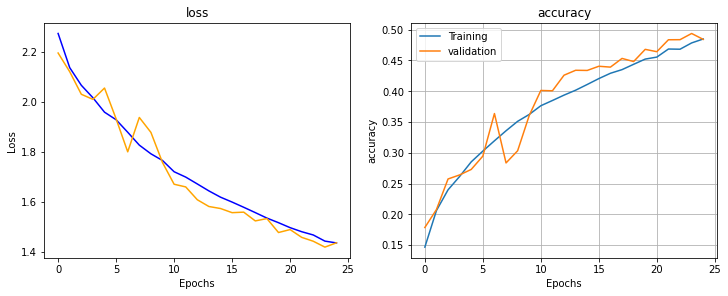

In [17]:
loss_train = trainedModel.history['loss']
loss_val = trainedModel.history['val_loss']
accu_train = trainedModel.history['accuracy']
accu_val = trainedModel.history['val_accuracy']
epochs=range(25)
f,ax=plt.subplots(1,2,figsize=(10,4),constrained_layout=True)
ax[0].plot(epochs, loss_train,color='blue', label='Training loss')
ax[0].plot(epochs, loss_val,color='orange', label='validation loss')
ax[0].set(title='loss',xlabel='Epochs',ylabel='Loss')
ax[1].plot(epochs, accu_train, label='Training')
ax[1].plot(epochs, accu_val, label='validation')
ax[1].set(title='accuracy',xlabel='Epochs',ylabel='accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss:', test_loss)
print('Test_accuracy:', test_accuracy)

Test_loss: 1.4243515729904175
Test_accuracy: 0.4903999865055084
